In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from os import path, makedirs, listdir

In [2]:
from utils.utils import generate_patches
from predict import *

In [3]:
from hydra import initialize, compose
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="conf/"):
    cfg = compose(config_name='config.yaml')

In [4]:
task = cfg.task
pre_patches_dir = path.join(cfg.patches_dir, "pre")
post_patches_dir = path.join(cfg.patches_dir, "post")

if task.generate_patches:
    makedirs(pre_patches_dir, exist_ok=True)
    generate_patches(path.join(cfg.data_dir, "pre"), path.join(cfg.patches_dir, "pre"))
    
    makedirs(post_patches_dir, exist_ok=True)
    generate_patches(path.join(cfg.data_dir, "post"), path.join(cfg.patches_dir, "post"))

In [5]:
pre_img = cv2.imread("data/patches/pre/031133012123/image_15_16.png")
post_img = cv2.imread("data/patches/post/031133012123/image_15_16.png")

pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
post_img = cv2.cvtColor(post_img, cv2.COLOR_BGR2RGB)

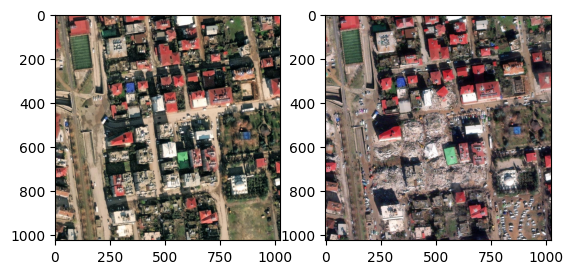

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(pre_img)
ax[1].imshow(post_img)

In [7]:
makedirs(cfg.prediction_dir, exist_ok=True)
if task.predict_loc:
    predict_localization(pre_patches_dir)

In [8]:
pre_img_loc_msk1 = np.array(Image.open("prediction/localization/pred34_loc/031133012123/image_15_16.png"))
pre_img_loc_msk2 = np.array(Image.open("prediction/localization/pred50_loc_tuned/031133012123/image_15_16.png"))
pre_img_loc_msk3 = np.array(Image.open("prediction/localization/pred92_loc_tuned/031133012123/image_15_16.png"))
pre_img_loc_msk4 = np.array(Image.open("prediction/localization/pred154_loc/031133012123/image_15_16.png"))

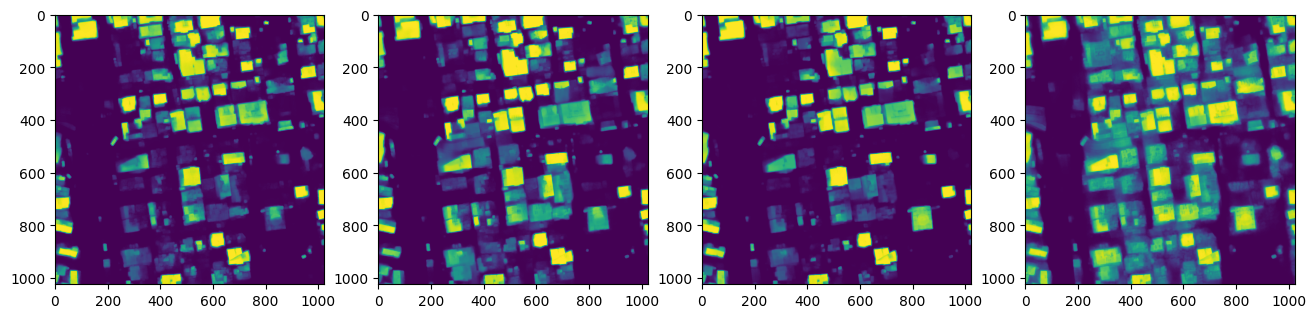

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

ax[0].imshow(pre_img_loc_msk1)
ax[1].imshow(pre_img_loc_msk2)
ax[2].imshow(pre_img_loc_msk3)
ax[3].imshow(pre_img_loc_msk4)

In [10]:
if task.predict_cls:
    predict_cls(pre_patches_dir)

In [37]:
des_path = "prediction/destruction/"
des_models = sorted(listdir(des_path))
print(des_models)
des_imgs = []
for des_model in des_models:
    img_path = path.join(des_path, des_model, "031133012123/image_15_16_part2.png.png")
    img = np.array(Image.open(img_path))
    des_imgs.append(img)

['dpn92cls_cce_0_tuned', 'dpn92cls_cce_1_tuned', 'dpn92cls_cce_2_tuned', 'res34cls2_0_tuned', 'res34cls2_1_tuned', 'res34cls2_2_tuned', 'res50cls_cce_0_tuned', 'res50cls_cce_1_tuned', 'res50cls_cce_2_tuned', 'se154cls_0_tuned', 'se154cls_1_tuned', 'se154cls_2_tuned']


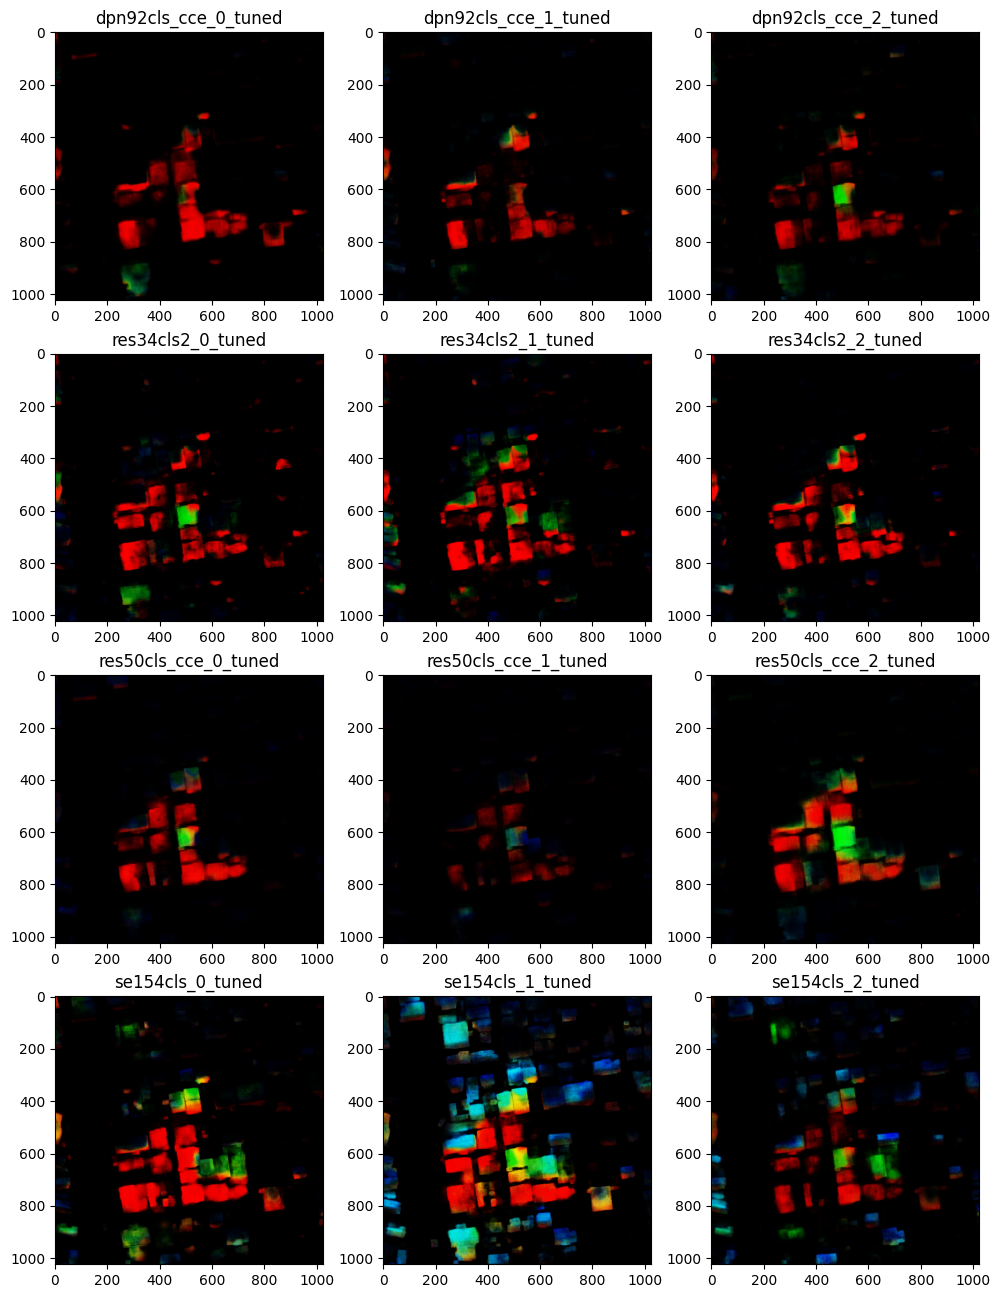

In [49]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12,16))
for i, img in enumerate(des_imgs):
    x, y = i//3, i%3
    ax[x, y].set_title(des_models[i])
    ax[x, y].imshow(img)

In [13]:
if task.create_sub:
    create_submission(pre_patches_dir)

### Submission

In [25]:
loc_img = np.array(Image.open("prediction/submission/localization/031133012123/image_15_16.png"))
des_img = np.array(Image.open("prediction/submission/destruction/031133012123/image_15_16.png"))

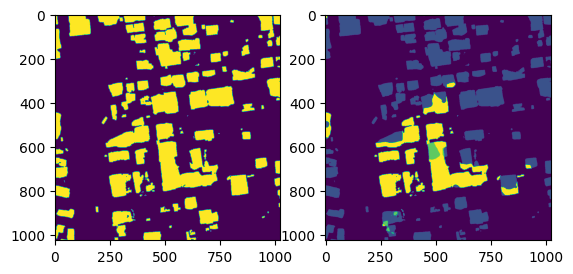

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(loc_img)
ax[1].imshow(des_img)

### Overlay

In [27]:
loc_img = np.array(Image.open("prediction/localization_overlay/031133012123/image_15_16.png"))
des_img = np.array(Image.open("prediction/destruction_overlay/031133012123/image_15_16.png"))

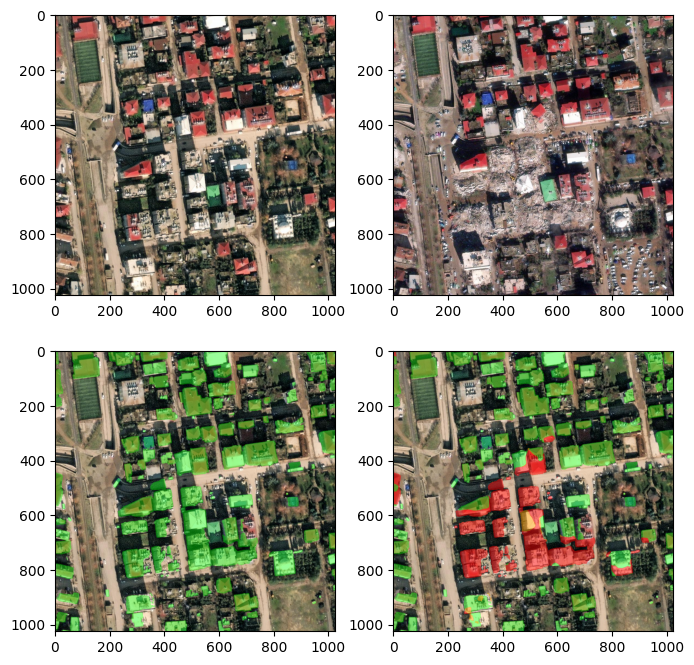

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(pre_img)
ax[0, 1].imshow(post_img)
ax[1, 0].imshow(loc_img)
ax[1, 1].imshow(des_img)